In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [22]:
fmnist_data = keras.datasets.fashion_mnist

In [23]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
y_train.shape

(60000,)

In [27]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

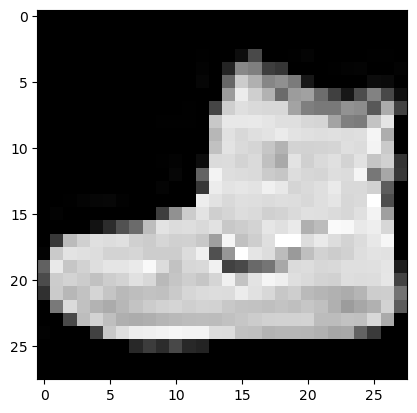

In [28]:
plt.imshow(x_train[0,], cmap="gray")

In [29]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [30]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    # keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal" ),
    keras.layers.Dense(100, activation="relu", kernel_initializer=init_1),

    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [34]:
weights, bias = model.layers[1].get_weights()

In [35]:
weights

array([[ 0.10884281, -0.0333021 ,  0.08996764, ..., -0.08729265,
        -0.11161485, -0.0732825 ],
       [-0.04003349,  0.03816853,  0.09641333, ...,  0.08617571,
         0.02550189,  0.06587657],
       [-0.04262242,  0.00771757, -0.02436065, ..., -0.03579472,
        -0.0052    , -0.05721835],
       ...,
       [ 0.07156529,  0.04609609,  0.10139693, ..., -0.05440336,
         0.0736481 ,  0.02675721],
       [ 0.0332811 ,  0.11465198,  0.04343335, ..., -0.05064733,
         0.056178  , -0.0533744 ],
       [ 0.01569778, -0.07256852, -0.11106201, ...,  0.06197628,
         0.04636623, -0.04142237]], dtype=float32)

In [36]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile Model

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Model

In [38]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.15)

Epoch 1/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6385 - loss: 1.0944 - val_accuracy: 0.8084 - val_loss: 0.5587
Epoch 2/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8154 - loss: 0.5385 - val_accuracy: 0.8207 - val_loss: 0.5031
Epoch 3/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8313 - loss: 0.4777 - val_accuracy: 0.8392 - val_loss: 0.4596
Epoch 4/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8446 - loss: 0.4465 - val_accuracy: 0.8480 - val_loss: 0.4395
Epoch 5/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8487 - loss: 0.4235 - val_accuracy: 0.8419 - val_loss: 0.4414


In [39]:
history.history

{'accuracy': [0.7378039360046387,
  0.8220391869544983,
  0.835745096206665,
  0.8478235006332397,
  0.8528235554695129],
 'loss': [0.7783991098403931,
  0.5178002715110779,
  0.46873942017555237,
  0.43958351016044617,
  0.4194698631763458],
 'val_accuracy': [0.8084444403648376,
  0.8206666707992554,
  0.8392221927642822,
  0.8479999899864197,
  0.8418889045715332],
 'val_loss': [0.5587182641029358,
  0.5030840039253235,
  0.4595889747142792,
  0.4394909143447876,
  0.44143322110176086]}

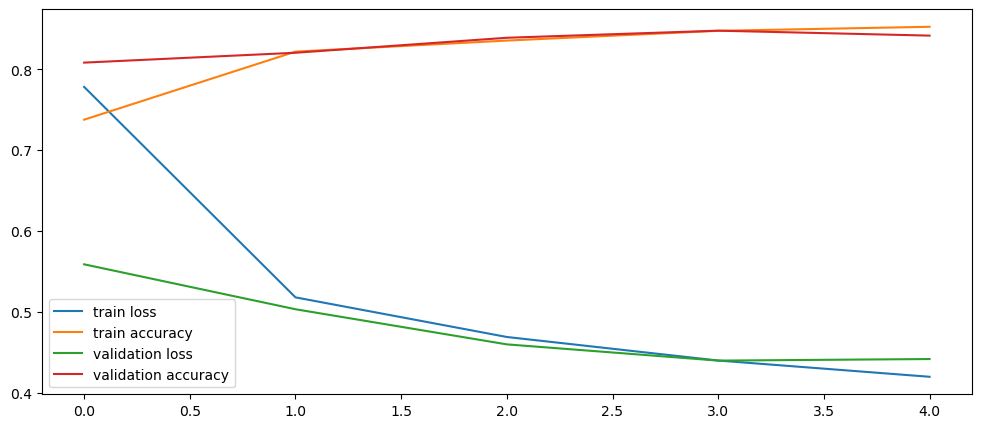

In [40]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

# Evaluate Test Model

In [41]:
model.evaluate(x_test, y_test, verbose=0)

[0.4681212306022644, 0.8346999883651733]

In [42]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

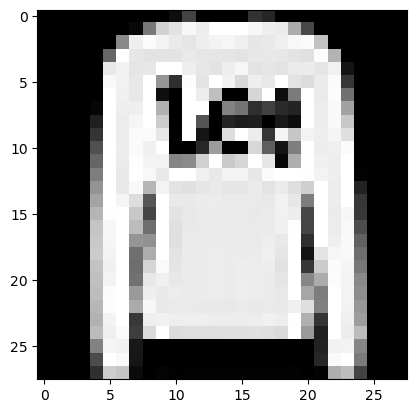

In [43]:
plt.imshow(x3[0], cmap="gray")

In [44]:
model.predict(x3).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[0.001, 0.   , 0.86 , 0.   , 0.022, 0.   , 0.116, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [45]:
model.predict(x3).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


(2, 10)

In [46]:
np.argmax(model.predict(x3),  axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([2, 1])

In [47]:
 y_test[1:3]

array([2, 1], dtype=uint8)